<a href="https://colab.research.google.com/github/aayRJ23/Heart-Disease-Prediction/blob/main/HeartDiseasePredictionwb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection And Processing

In [ ]:
#loading the csv data to a Pandas DataFrame
df =pd.read_csv('./data.csv')

# New Section

In [ ]:
#print first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# print last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# number of rows and columns in the dataset
df.shape

(303, 14)

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


1 --> Defective Heart &
0 --> Healthy Heart

Splitting the Features and Target .
Features refers to the all attributes other than the target(result).
As in the given dataset , All both features and target are combined , So we need to spilt them.


<Axes: xlabel='target', ylabel='count'>

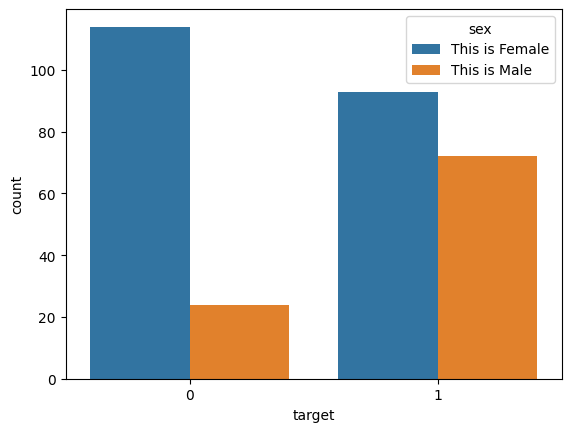

In [ ]:
# Section 1 - Plotting
sns.countplot(data=df,x='target',hue='sex')

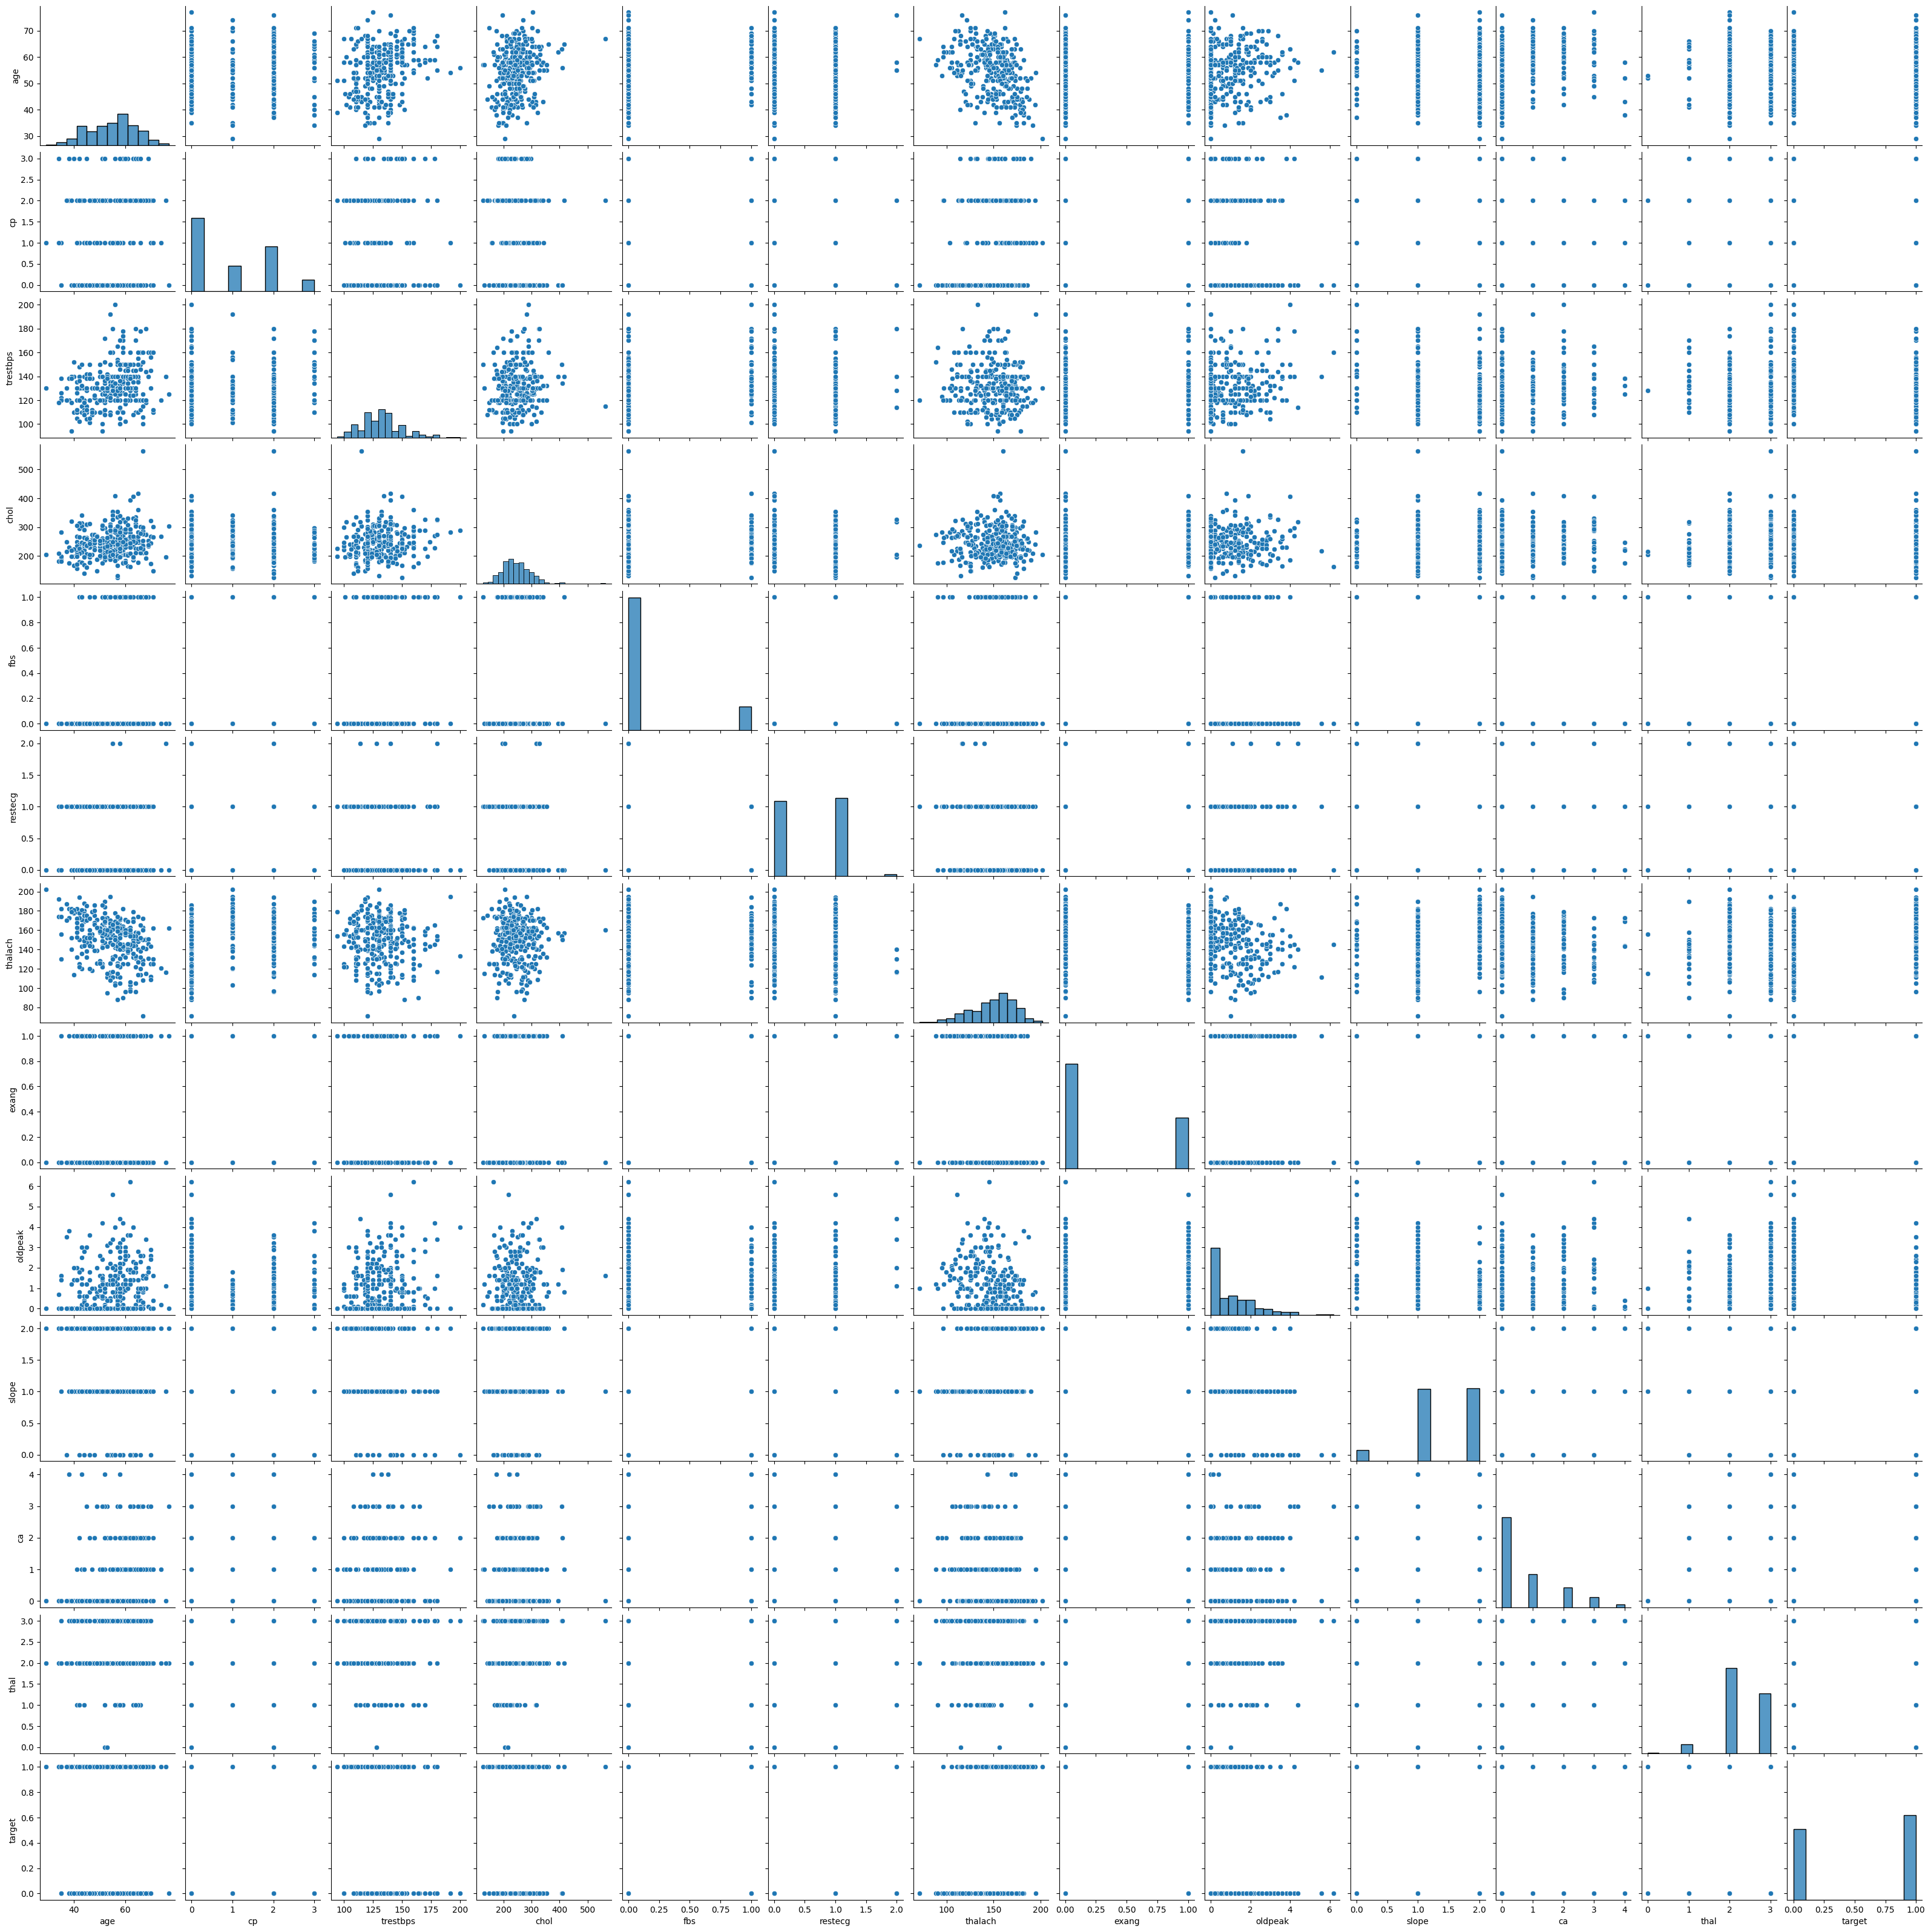

In [ ]:
sns.pairplot(data=df)

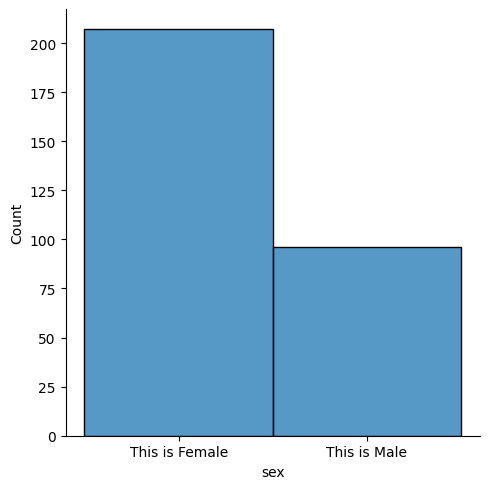

In [ ]:
sns.displot(df['sex'])

In [ ]:
df.corr()

<ipython-input-66-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736
trestbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439
exang,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764


<ipython-input-65-8001899daae3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f" , annot_kws={"color": "black" , "size": 8 } , cmap="coolwarm" )


<Axes: >

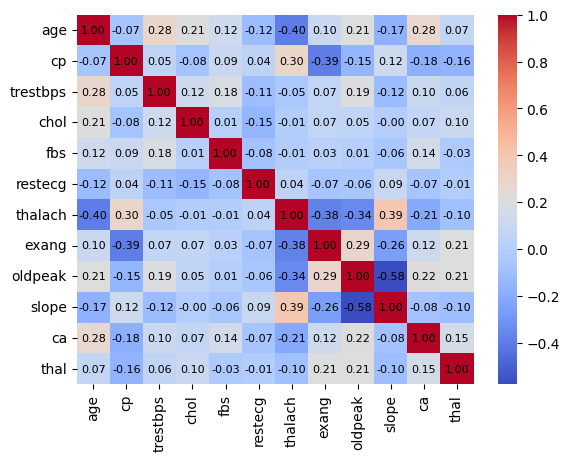

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f" , annot_kws={"color": "black" , "size": 8 } , cmap="coolwarm" )

In [ ]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [ ]:
X = df[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']]
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(lm.intercept_)

0.9450928919200094


In [ ]:
prediction = lm.predict(X_test)

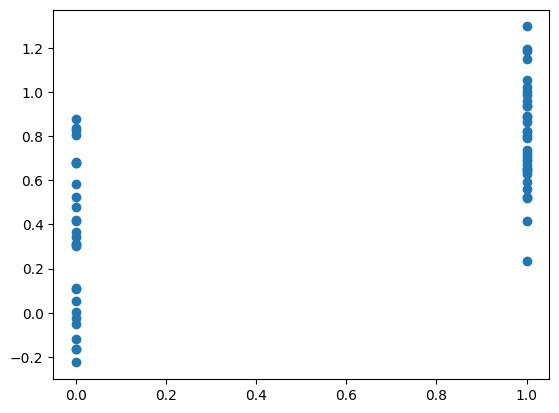

In [ ]:
plt.scatter(y_test,prediction)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(y_test,prediction)

0.14614103089448724

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

0.38228396630579115

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipe.score(X_test, y_test)

0.8032786885245902

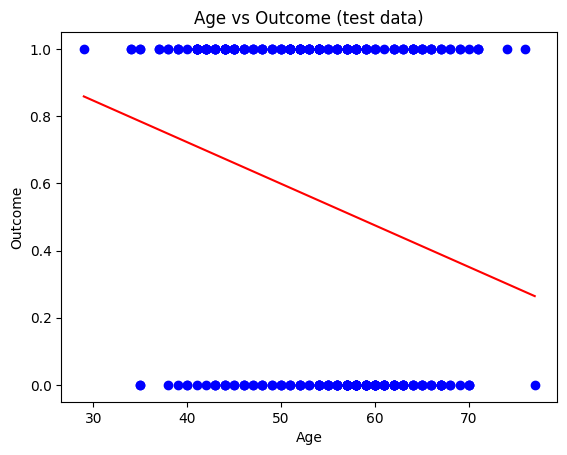

In [ ]:
plt.xlabel("Age")
plt.ylabel("Outcome")
plt.title("Age vs Outcome (test data)")

m, b = np.polyfit(df['age'], df['target'], 1)
plt.plot(df['age'],  df['target'], 'bo', df['age'], m*df['age']+b, '-r')

plt.show()

In [ ]:
print(df['age'])

0      29
1      34
2      34
3      35
4      35
       ..
298    71
299    71
300    74
301    76
302    77
Name: age, Length: 303, dtype: int64


In [ ]:
print(df['target'])

0      1
1      1
2      1
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
document = '''At five o'clock in the morning I went to railway station near by my home.
              I'll never go to that railway station again.
              '''
print(document)

At five o'clock in the morning I went to railway station near by my home.
              I'll never go to that railway station again.
              


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
words = nltk.word_tokenize(document)
print(words)

['At', 'five', "o'clock", 'in', 'the', 'morning', 'I', 'went', 'to', 'railway', 'station', 'near', 'by', 'my', 'home', '.', 'I', "'ll", 'never', 'go', 'to', 'that', 'railway', 'station', 'again', '.']


In [ ]:
sentences = nltk.sent_tokenize(document)
print(sentences)

["At five o'clock in the morning I went to railway station near by my home.", "I'll never go to that railway station again."]


Lets do tokenization


In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load your dataset

In [ ]:
newDataSet= pd.read_csv('./newData.csv')
df = pd.DataFrame(newDataSet)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,This is Female,1,130,204,0,0,202,0,0.0,2,0,2,Yes
1,34,This is Female,3,118,182,0,0,174,0,0.0,2,0,2,Yes
2,34,This is Male,1,118,210,0,1,192,0,0.7,2,0,2,Yes
3,35,This is Female,1,122,192,0,1,174,0,0.0,2,0,2,Yes
4,35,This is Male,0,138,183,0,1,182,0,1.4,2,0,2,Yes


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,71,This is Male,1,160,302,0,1,162,0,0.4,2,2,2,Yes
299,71,This is Male,0,112,149,0,1,125,0,1.6,1,0,2,Yes
300,74,This is Male,1,120,269,0,0,121,1,0.2,2,1,2,Yes
301,76,This is Male,2,140,197,0,2,116,0,1.1,1,0,2,Yes
302,77,This is Female,0,125,304,0,0,162,1,0.0,2,3,2,No


What is Tokeinzation ? Just see the demonstration

In [ ]:
word_tokenize("This is a boy")

['This', 'is', 'a', 'boy']

*Extract the gender column data from the dataset*

In [ ]:
df['sex'] = df['sex'].apply(lambda x: word_tokenize(x)[2])

In [ ]:
df['sex'] = df['sex'].map({'Male': 0, 'Female': 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,Yes
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,Yes
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,Yes
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,Yes
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,Yes


In [ ]:
df['target'] = df['target'].map({'No': 0, 'Yes': 1})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams
with open("./ngramdemo.rtf", "r", encoding='latin-1') as file:
    text = file.read()
text[0:1000]

FileNotFoundError: [Errno 2] No such file or directory: './ngramdemo.rtf'

In [ ]:
text = re.sub('<.*>','',text)
text = re.sub('ENDOFARTICLE.','',text)
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
text = re.sub(punctuationNoPeriod, "", text)
text[0:1000]

'\\rtf1\\ansi\\ansicpg1252\\cocoartf2759\n\\cocoatextscaling0\\cocoaplatform0\\fonttbl\\f0\\fswiss\\fcharset0 Helvetica\n\\colortbl\\red255\\green255\\blue255\n\\\\expandedcolortbl\n\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww11520\\viewh8400\\viewkind0\n\\pard\\tx720\\tx1440\\tx2160\\tx2880\\tx3600\\tx4320\\tx5040\\tx5760\\tx6480\\tx7200\\tx7920\\tx8640\\pardirnatural\\partightenfactor0\n\n\\f0\\fs24 \\cf0 Space exploration has long captured the imagination of humanity serving as a testament to our innate curiosity and desire to explore the unknown From the earliest observations of the night sky by ancient civilizations to the modernday missions to distant planets and galaxies space exploration has evolved into one of the most profound endeavors of human history Its significance transcends scientific discovery encompassing technological innovation international collaboration and the inspiration of future generations\\\nThe history of space exploration is marked by key miles

In [ ]:
tokenized = text.split()
esBigrams = ngrams(tokenized, 2)

In [ ]:
esBigramFreq = collections.Counter(esBigrams)
esBigramFreq.most_common(10)

[(('space', 'exploration'), 9),
 (('of', 'the'), 7),
 (('of', 'space'), 5),
 (('exploration', 'has'), 3),
 (('to', 'the'), 3),
 (('technological', 'innovation'), 3),
 (('Space', 'exploration'), 2),
 (('of', 'humanity'), 2),
 (('as', 'a'), 2),
 (('to', 'explore'), 2)]

Lets Implement Decision Tree

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
1,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
2,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
3,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
4,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
299,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
300,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
301,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data.csv')

In [ ]:
import pandas as pd

Now categorizing the each attribute , because it was containing numerical at starting

In [ ]:

# Replace values for Age
df['age'] = pd.cut(df['age'], bins=[0, 40, 60, 100], labels=['Young', 'Middle-aged', 'Senior'])

# Replace values for Sex
df['sex'] = df['sex'].map({0: 'Male', 1: 'Female'})

# Replace values for Chest Pain Type (cp)
cp_mapping = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
df['cp'] = df['cp'].map(cp_mapping)

# Replace values for Resting Blood Pressure (trestbps)
df['trestbps'] = pd.cut(df['trestbps'], bins=[0, 120, 140, float('inf')], labels=['Low', 'Normal', 'High'])

# Replace values for Serum Cholesterol (chol)
df['chol'] = pd.cut(df['chol'], bins=[0, 200, 240, float('inf')], labels=['Normal', 'Borderline High', 'High'])

# Replace values for Fasting Blood Sugar (fbs)
df['fbs'] = df['fbs'].map({0: 'Normal', 1: 'High'})

# Replace values for Resting Electrocardiographic Results (restecg)
df['restecg'] = df['restecg'].map({0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Hypertrophy'})

# Replace values for Maximum Heart Rate Achieved (thalach)
df['thalach'] = pd.cut(df['thalach'], bins=[0, 100, 150, float('inf')], labels=['Low', 'Normal', 'High'])

# Replace values for Exercise Induced Angina (exang)
df['exang'] = df['exang'].map({0: 'No', 1: 'Yes'})

# Replace values for Oldpeak (ST Depression)
df['oldpeak'] = pd.cut(df['oldpeak'], bins=[-float('inf'), 1, 2, float('inf')], labels=['Low', 'Medium', 'High'])

# Replace values for Slope of the Peak Exercise ST Segment (slope)
df['slope'] = df['slope'].map({0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'})

# Replace values for Number of Major Vessels Colored by Fluoroscopy (ca)
# No changes needed as it's already categorical

# Replace values for Thalassemia (thal)
df['thal'] = df['thal'].map({0: 'Normal', 1: 'Fixed Defect', 2: 'Reversible Defect'})

# Replace values for target
df['target'] = df['target'].map({0: 'Disease Absent', 1: 'Disease Present'})


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,Senior,Female,Asymptomatic,High,Borderline High,High,Normal,Normal,No,High,Upsloping,0,Fixed Defect,Disease Present
1,Young,Female,Non-Anginal Pain,Normal,High,Normal,ST-T Wave Abnormality,High,No,High,Upsloping,0,Reversible Defect,Disease Present
2,Middle-aged,Male,Atypical Angina,Normal,Borderline High,Normal,Normal,High,No,Medium,Downsloping,0,Reversible Defect,Disease Present
3,Middle-aged,Female,Atypical Angina,Low,Borderline High,Normal,ST-T Wave Abnormality,High,No,Low,Downsloping,0,Reversible Defect,Disease Present
4,Middle-aged,Male,Typical Angina,Low,High,Normal,ST-T Wave Abnormality,High,Yes,Low,Downsloping,0,Reversible Defect,Disease Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Middle-aged,Male,Typical Angina,Normal,High,Normal,ST-T Wave Abnormality,Normal,Yes,Low,Flat,0,NaN,Disease Absent
299,Middle-aged,Female,Asymptomatic,Low,High,Normal,ST-T Wave Abnormality,Normal,No,Medium,Flat,0,NaN,Disease Absent
300,Senior,Female,Typical Angina,High,Normal,High,ST-T Wave Abnormality,Normal,No,High,Flat,2,NaN,Disease Absent
301,Middle-aged,Female,Typical Angina,Normal,Normal,Normal,ST-T Wave Abnormality,Normal,Yes,Medium,Flat,1,NaN,Disease Absent


Now as We can see that , the whole data has been converted into textual classes . So now Lets Implement the Decision Tree

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
age=LabelEncoder()
sex=LabelEncoder()
cp=LabelEncoder()
trestbps=LabelEncoder()
chol=LabelEncoder()
fbs=LabelEncoder()
restecg=LabelEncoder()
thalach=LabelEncoder()
exang=LabelEncoder()
oldpeak=LabelEncoder()
slope=LabelEncoder()
ca=LabelEncoder()
thal=LabelEncoder()
target=LabelEncoder()

In [ ]:
df['age']=age.fit_transform(df['age'])
df['sex']=age.fit_transform(df['sex'])
df['cp']=age.fit_transform(df['cp'])
df['trestbps']=age.fit_transform(df['trestbps'])
df['chol']=age.fit_transform(df['chol'])
df['fbs']=age.fit_transform(df['fbs'])
df['restecg']=age.fit_transform(df['restecg'])
df['thalach']=age.fit_transform(df['thalach'])
df['exang']=age.fit_transform(df['exang'])
df['oldpeak']=age.fit_transform(df['oldpeak'])
df['slope']=age.fit_transform(df['slope'])
df['ca']=age.fit_transform(df['ca'])
df['thal']=age.fit_transform(df['thal'])
df['target']=age.fit_transform(df['target'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,0,0,0,0,0,1,2,0,0,2,0,0,1
1,2,0,2,2,1,1,2,0,0,0,2,0,2,1
2,0,1,1,2,0,1,1,0,0,2,0,0,2,1
3,0,0,1,1,0,1,2,0,0,1,0,0,2,1
4,0,1,3,1,1,1,2,0,1,1,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,3,2,1,1,2,2,1,1,1,0,3,0
299,0,0,0,1,1,1,2,2,0,2,1,0,3,0
300,1,0,3,0,2,0,2,2,0,0,1,2,3,0
301,0,0,3,2,2,1,2,2,1,2,1,1,3,0


In [ ]:
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,0,0,0,0,0,1,2,0,0,2,0,0
1,2,0,2,2,1,1,2,0,0,0,2,0,2
2,0,1,1,2,0,1,1,0,0,2,0,0,2
3,0,0,1,1,0,1,2,0,0,1,0,0,2
4,0,1,3,1,1,1,2,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,1,3,2,1,1,2,2,1,1,1,0,3
299,0,0,0,1,1,1,2,2,0,2,1,0,3
300,1,0,3,0,2,0,2,2,0,0,1,2,3
301,0,0,3,2,2,1,2,2,1,2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
classifier = DecisionTreeClassifier(criterion='gini' , max_depth=8)

In [ ]:
# Fit the model
classifier.fit(X_train, y_train )

DecisionTreeClassifier(max_depth=8)

In [ ]:
accuracy = classifier.score(X_test , y_test)
print("Accuracy : " , accuracy)

Accuracy :  0.8360655737704918


In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

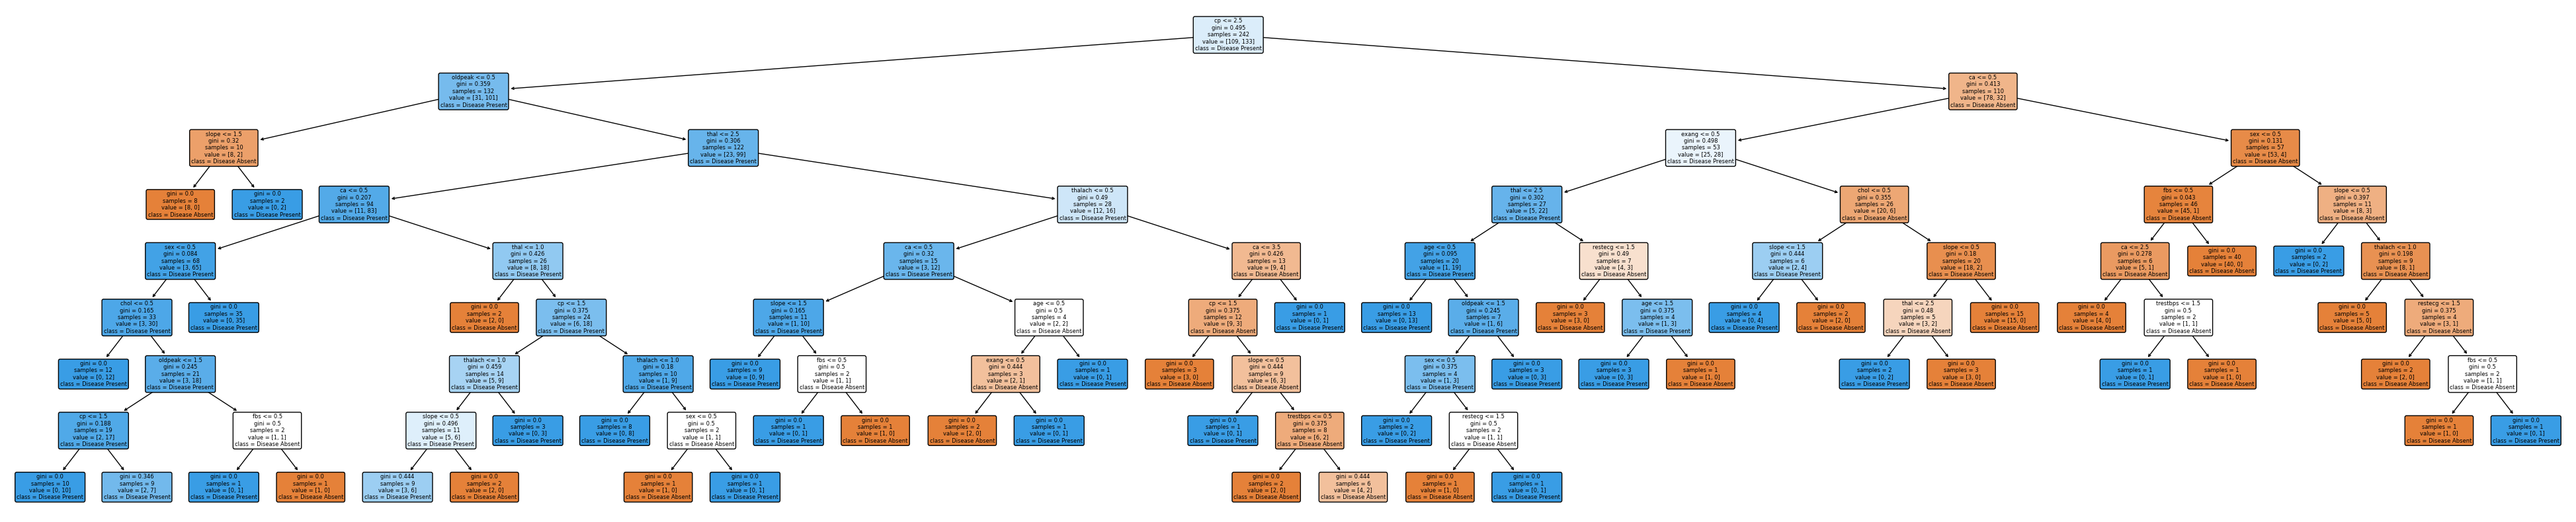

In [ ]:
plt.figure(figsize=(50, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['Disease Absent', 'Disease Present'], filled=True, rounded=True, fontsize=16)
plt.show()

Assignment -  PCA

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X = df.drop("target",axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=30)

 **Using PCA to reduce dimensions**

> A principal component analysis (PCA) plot shows similarities between groups of samples in a data set. Each point on a PCA plot represents a correlation between an initial variable and the first and second principal components.



In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.22673448e+01,  2.87383781e+00],
       [ 2.69013712e+00, -3.98713736e+01],
       [-4.29502141e+01, -2.36368199e+01],
       [-1.09447564e+01, -2.84380358e+01],
       [ 1.06979053e+02, -1.58744678e+01],
       [-5.36472038e+01,  4.00392377e+00],
       [ 4.80821551e+01, -3.03896086e+00],
       [ 1.55660590e+01, -2.62745637e+01],
       [-4.54388962e+01, -7.42977739e+00],
       [-7.73163161e+01, -1.99100759e+01],
       [-6.94323738e+00, -9.17536374e+00],
       [ 2.84259379e+01,  8.47126467e+00],
       [ 1.92477377e+01, -2.24212575e+01],
       [-3.58055558e+01,  5.70343964e+00],
       [ 3.75886896e+01, -1.02579437e+01],
       [-2.79998518e+01, -9.64570379e+00],
       [ 9.29750393e+01, -2.42584272e+01],
       [-1.86307973e+01,  3.92597411e+01],
       [ 1.00245407e+00, -2.10404091e+01],
       [-6.28419048e+00,  2.34469473e+00],
       [-1.19811457e+01, -9.66308502e+00],
       [-1.39453649e+01, -3.05172542e+01],
       [-2.05255102e+01, -2.87200024e+01],
       [-2.

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8688524590163934

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
lm = LogisticRegression()
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train_pca, y_train)
pipe.score(X_test_pca, y_test)

0.7868852459016393

Implementation of PCA

In [ ]:
def pca(X, n_components):

    # 1 Standardizing the data = ( X - mean ) / standard deviation = 0 - 1
    Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    # 2 Calculating the covariance matrix Z
    cov_matrix = np.cov(Z, rowvar=False)

    #3 Calculating eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    #4 Sorting eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    #5 Selecting the top 'n_components' eigenvectors P*
    principal_components = sorted_eigenvectors[:, :n_components]

    # Projecting the data onto the principal components Z*
    X_pca = np.dot(Z, principal_components)

    return X_pca


In [ ]:
X = df.drop("target",axis='columns')
y = df.target

# Number of components to keep
n_components = 5

# Perform PCA
X_pca = pca(X, n_components)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [ ]:
lm = LogisticRegression()
lm.fit(X_train_pca, y_train)
lm.score(X_test_pca, y_test)

0.8360655737704918

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**ASSIGNMENT : CLUSTERING (Using K Means Clustering Algorithm)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

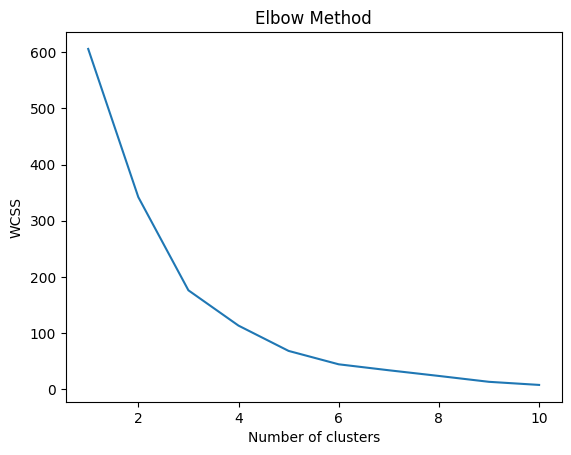

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


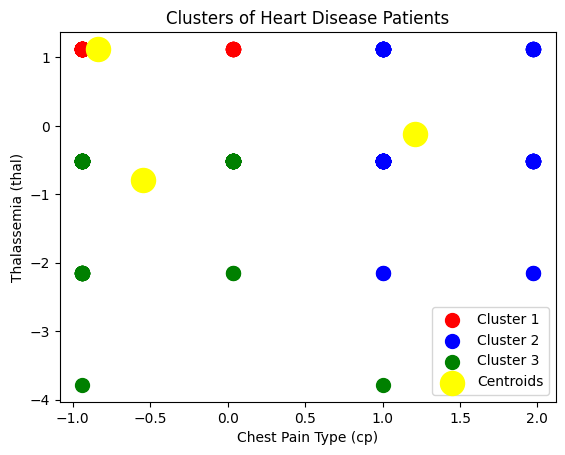

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Importing the dataset
dataset = pd.read_csv('data.csv')  # Update with your dataset filename

# Selecting the relevant features
X = dataset[['cp', 'thal']].values

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determining the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Training the K-means model on the dataset
optimal_clusters = 3  # Adjust based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Heart Disease Patients')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Thalassemia (thal)')
plt.legend()
plt.show()


**ASSIGNMENT : CLUSTERING (Using K Means Clustering Algorithm)** ++

Step-1: Data pre-processing Step

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('data.csv')

# Extracting Independent Variables
X = dataset[['cp', 'thal']].values

Step-2: Finding the optimal number of clusters using the elbow method

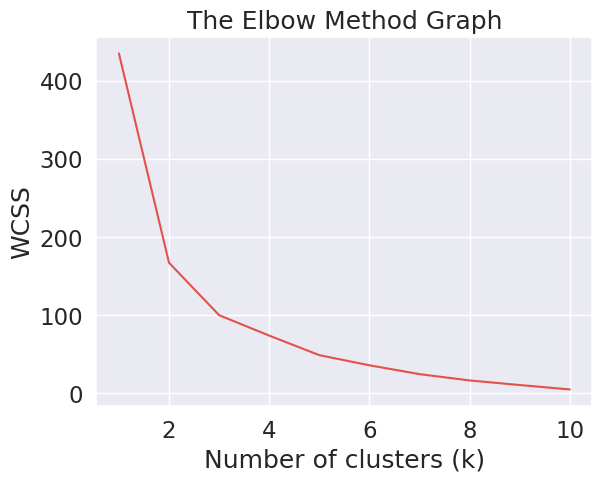

In [ ]:
# Finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans

wcss_list = []  # Initializing the list for the values of WCSS

# Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.plot(range(1, 11), wcss_list)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

Step- 3: Training the K-means algorithm on the training dataset

In [ ]:
# Training the K-means model on the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)

Step-4: Visualizing the Clusters

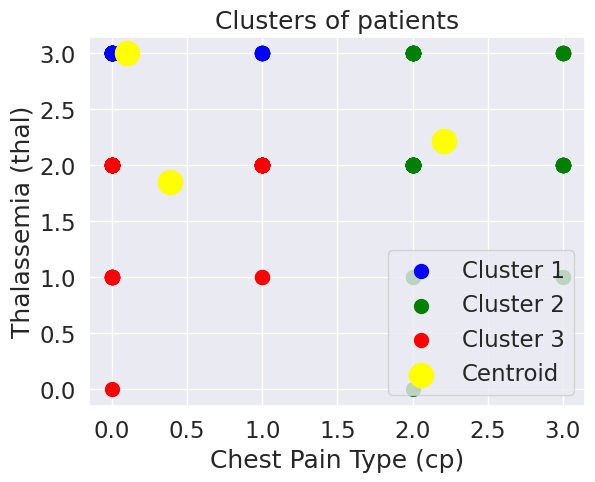

In [ ]:
# Visualizing the clusters
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_predict == 2, 0], X[y_predict == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of patients')
plt.xlabel('Chest Pain Type (cp)')
plt.ylabel('Thalassemia (thal)')
plt.legend()
plt.show()

Step-5: Calculating the Accuracy

In [ ]:
# Extracting the dependent variable (target/labels)
y_true = dataset['target'].values  # Assuming 'target' is the column indicating heart disease presence (1) or absence (0)

# Calculating accuracy of the clusters
from sklearn.metrics import accuracy_score

# Map cluster labels to majority class label
cluster_majority_label = {}

for cluster in np.unique(y_predict):
    cluster_labels = y_true[y_predict == cluster]
    majority_label = np.bincount(cluster_labels).argmax()
    cluster_majority_label[cluster] = majority_label

# Assign predicted labels based on majority class in each cluster
y_predicted_labels = [cluster_majority_label[cluster] for cluster in y_predict]

# Calculate accuracy
accuracy = accuracy_score(y_true, y_predicted_labels)

print("Accuracy of the Clusters:", accuracy)

Accuracy of the Clusters: 0.7524752475247525


ANOTHER EXAMPLE

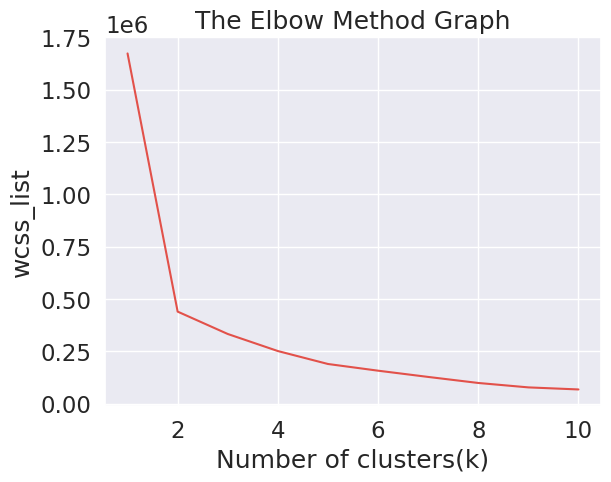

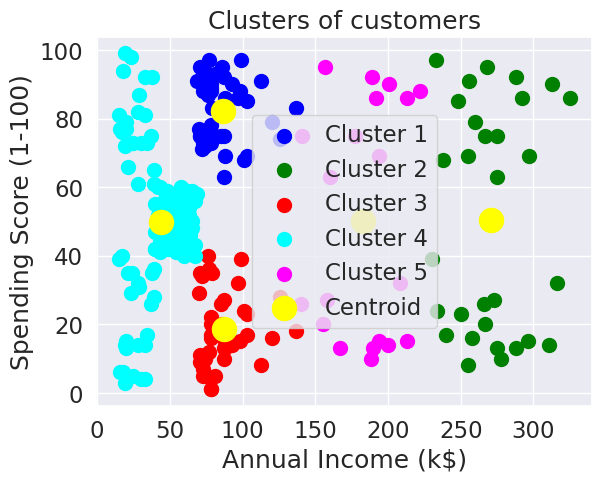

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

x = dataset.iloc[:, [3, 4]].values

#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

#training the K-means model on a dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
y_predict= kmeans.fit_predict(x)

#visulaizing the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()



Date - 16/04/2024

---


FEATURE SELECTION - CODE (ASSIGNMENT)
---
Objective - Calculate Accuracy of the model , before and after performing the feature selection.

Step 1 : Load the Dependencies

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif

Step 2 : Load the DataSet

In [60]:
data = pd.read_csv('data.csv')

Step 3 : Display basic information about the dataset

In [61]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (303, 14)


In [62]:
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


Step 2: Split the data into training and testing sets

In [64]:
# Separate features (X) and target variable (y)
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

In [65]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Train a machine learning model and evaluate its accuracy

In [66]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model without feature selection:", accuracy)

Accuracy of the model without feature selection: 0.8360655737704918


Step 4 : Perform feature selection using Information Gain

In [67]:
# Calculate information gain (mutual information) for each feature
info_gain = mutual_info_classif(X, y, random_state=30)

# Create a DataFrame to store feature names and their corresponding information gains
feature_info_gain_df = pd.DataFrame({'Feature': X.columns, 'Information_Gain': info_gain})

# Sort features by information gain in descending order
feature_info_gain_df = feature_info_gain_df.sort_values(by='Information_Gain', ascending=False)

# Select top k features (you can choose the number of features based on information gain)
k = 4
selected_features_info_gain = feature_info_gain_df.head(k)['Feature'].values

Step 5 : Train the model again using selected features and evaluate its accuracy

In [68]:
# Train the model on the training data with selected features based on information gain
rf_classifier_info_gain = RandomForestClassifier(random_state=42)
rf_classifier_info_gain.fit(X_train[selected_features_info_gain], y_train)

# Make predictions on the testing data with selected features based on information gain
y_pred_info_gain = rf_classifier_info_gain.predict(X_test[selected_features_info_gain])

# Calculate accuracy with selected features based on information gain
accuracy_info_gain = accuracy_score(y_test, y_pred_info_gain)
print("Accuracy of the model with feature selection using Information Gain:", accuracy_info_gain)

Accuracy of the model with feature selection using Information Gain: 0.9180327868852459
